In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
plt.style.use(["ggplot", "../.default.mplstyle"])

In [2]:
import traceback
import numpy as np
import pandas as pd
import GPy
import scipy

import aggregate
import objective
import aquisition
import distribution
import modeler

In [8]:
%matplotlib inline

In [4]:
from importlib import reload
reload(aggregate)
reload(objective)

<module 'objective' from '/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/simulations/objective.py'>

In [5]:
def label_simulation_plots(axes, ylabel=""):
    
    for i in range(3):
        axes[1, i].set_xlabel("iteration")
        
    for i in range(2):
        axes[i, 0].set_ylabel(ylabel)
    
    axes[0,0].legend()

# overview

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


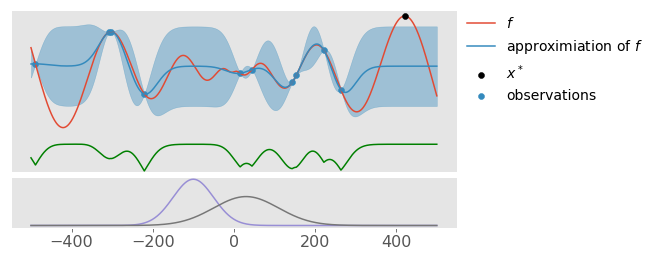

In [9]:
o = objective.Schwefel(d=1)
x = o.sample_space(1000)

f = -o(x)

pn = x.shape[0]
n = 10
scipy.random.seed(5)
xi = np.random.choice(np.arange(pn), n, replace=False)
# x = o.sample_space(pn)[np.random.choice(np.arange(pn), n, replace=False)]
mx = x[xi]
y = -o(mx)[:, None]

builder = modeler.Modeler(o, noiseless=True, kernel=GPy.kern.RBF(x.shape[1], ARD=False))

m = builder.build(mx, y, resample=2)

mu, var = m.predict(builder.transform(x))
mu = mu[:, 0]
var = var[:, 0]

nmu = mu * y.std() + y.mean()
nvar = var * y.var()

a = aquisition.SBUCB_LocalPenalty(sample_size=3)
a._precompute(m, builder, x, mu, var, False, n, pn)
alpha = mu + a.beta(mx.shape[0], x.shape[0]) * np.sqrt(var)

plt.figure(figsize=(8,4))

frows = 6
prows = 2

rows, cols = frows+prows, 4
ax = plt.subplot2grid((rows, cols), (0, 0), colspan=cols, rowspan=frows)
plt.plot(x, f, zorder=1, label="$f$")
plt.scatter(o.optimum, o(o.optimum), marker="o", c="k", zorder=2, label='$x^*$')

plt.plot(x, nmu, label="approximiation of $f$")
plt.fill_between(x[:,0], nmu-2*np.sqrt(nvar), nmu+2*np.sqrt(nvar), alpha=.4, color="C1")
plt.scatter(mx, y, c="C1", label="observations")

# plt.legend()

# plt.xticks([])
d = f.max() - f.min()
plt.ylim(f.min() - d*.4, f.max()+d*.05)
plt.yticks([])
plt.grid(False)
plt.xticks([])

# ax = plt.subplot2grid((rows, cols), (frows, 0), colspan=cols, rowspan=arows)
plt.twinx()
plt.plot(x[:,0], alpha, color='green', label="aquisition")
plt.yticks([])
plt.grid(False)
d = alpha.max() - alpha.min()
plt.ylim(alpha.min() - d*.05, alpha.max() + 5*d)

ax.legend(loc='upper left', bbox_to_anchor= (1.01, 1), ncol=1, 
            borderaxespad=0, frameon=False)

ax = plt.subplot2grid((rows, cols), (frows, 0), colspan=cols, rowspan=frows)
dists = [
    distribution.Discrete(x[:,0], scipy.stats.norm(-100, 50).pdf(x)),
    distribution.Discrete(x[:,0], scipy.stats.norm(30, 80).pdf(x))
        ]
plt.yticks([])
plt.grid(False)

for i, d in enumerate(dists):
#     plt.plot(x, [d.pdf(xx) for xx in x[:, 0]])
    plt.plot(x, d.pdf(x[:, 0]), c="C{}".format(i+2))

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


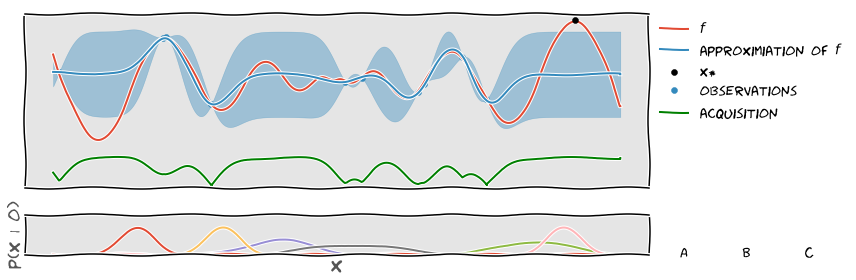

In [19]:
o = objective.Schwefel(d=1)
x = o.sample_space(1000)

f = -o(x)

pn = x.shape[0]
n = 10
scipy.random.seed(5)
xi = np.random.choice(np.arange(pn), n, replace=False)
# x = o.sample_space(pn)[np.random.choice(np.arange(pn), n, replace=False)]
mx = x[xi]
y = -o(mx)[:, None]

builder = modeler.Modeler(o, noiseless=True, kernel=GPy.kern.RBF(x.shape[1], ARD=False))

m = builder.build(mx, y, resample=2)

mu, var = m.predict(builder.transform(x))
mu = mu[:, 0]
var = var[:, 0]

nmu = mu * y.std() + y.mean()
nvar = var * y.var()

a = aquisition.SBUCB_LocalPenalty(sample_size=3)
a._precompute(m, builder, x, mu, var, False, n, pn)
alpha = mu + a.beta(mx.shape[0], x.shape[0]) * np.sqrt(var)

from matplotlib import rc
rc('text', usetex=False) 
with plt.xkcd():
    plt.figure(figsize=(12, 4))

    frows = 6
    prows = 2

    rows, cols = frows+prows, 4
    ax = plt.subplot2grid((rows, cols), (0, 0), colspan=cols, rowspan=frows)
    plt.plot(x, f, zorder=1, label="$f$")
    plt.scatter(o.optimum, o(o.optimum), marker="o", c="k", zorder=2, label='x*')

    plt.plot(x, nmu, label="approximiation of $f$")
    plt.fill_between(x[:,0], nmu-2*np.sqrt(nvar), nmu+2*np.sqrt(nvar), alpha=.4, color="C1")
    plt.scatter(mx, y, c="C1", label="observations")

    # plt.legend()

    # plt.xticks([])
    d = f.max() - f.min()
    plt.ylim(f.min() - d*.4, f.max()+d*.05)
    plt.yticks([])
    plt.grid(False)
    plt.xticks([])

    # ax = plt.subplot2grid((rows, cols), (frows, 0), colspan=cols, rowspan=arows)
    axt = plt.twinx()
    plt.plot(x[:,0], alpha, color='green', label="acquisition")
    plt.yticks([])
    plt.grid(False)
    d = alpha.max() - alpha.min()
    plt.ylim(alpha.min() - d*.05, alpha.max() + 5*d)

    ax.legend(loc='upper left', bbox_to_anchor= (1.01, 1), ncol=1, 
                borderaxespad=0, frameon=False)
    axt.legend(loc='upper left', bbox_to_anchor= (1.01, .5), ncol=1, 
                borderaxespad=0, frameon=False)

    ax = plt.subplot2grid((rows, cols), (frows, 0), colspan=cols, rowspan=frows)
    dists = [
        distribution.Discrete(x[:,0], scipy.stats.norm(-100, 50).pdf(x)),
        distribution.Discrete(x[:,0], scipy.stats.norm(30, 80).pdf(x)),
        distribution.Discrete(x[:,0], scipy.stats.norm(-200, 30).pdf(x)),
        distribution.Discrete(x[:,0], scipy.stats.norm(350, 60).pdf(x)),
        distribution.Discrete(x[:,0], scipy.stats.norm(400, 30).pdf(x)),
        distribution.Discrete(x[:,0], scipy.stats.norm(-350, 30).pdf(x)),
            ]
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    plt.ylabel("p(x | o)")

    for i, d in enumerate(dists):
        plt.plot(x, d.pdf(x[:, 0]), c="C{}".format(i+2))
        
    plt.ylim(-.0001, .02)
    
    plt.xlabel("x", fontsize=20)
    
    plt.text(1.05, 0, "A", transform=ax.transAxes)
    plt.text(1.15, 0, "B", transform=ax.transAxes)
    plt.text(1.25, 0, "C", transform=ax.transAxes)
    
plt.tight_layout()
plt.savefig("figures/sbucb-main-cartoon.pdf")

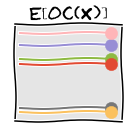

In [16]:
with plt.xkcd():
    plt.figure(figsize=(2, 2))
    for i, d in enumerate(dists):
        s = (d.pdf(x[:, 0])[:,0]*alpha).sum()
        # plt.barh(s, 1)
        plt.plot([0, 1], [s, s], zorder=2, c="C{}".format(i+2))
        plt.scatter([1], [s], zorder=3, s=150, c="C{}".format(i+2))
        
plt.xticks([])
plt.yticks([])
plt.title("E[oc(x)]")

plt.tight_layout()
plt.savefig("figures/sbucb-expectation-cartoon.pdf",bbox_inches="tight")

# objectives 

In [6]:
plt.figure(figsize=(10, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Dropwave,
    objective.Griewank,
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    o = o(d=1)
    z = o.sample_space(500)
    plt.subplot(2, 3, i + 1)
    plt.title(o.__class__.__name__)
    plt.plot(z, o(z))
    plt.axvline(o.optimum, c='r', alpha=.4)
    
    if i > 2:
        plt.xlabel('x')
    if i % 3 == 0:
        plt.ylabel('objective')
    
plt.tight_layout()
plt.savefig('figures/objectives-1d.pdf', bbox_inches="tight")

In [7]:
n = 500

plt.figure(figsize=(6, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Dropwave,
    objective.Griewank,
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel,
]):
    o = o(d=2)
    z = o.sample_space(n)
    plt.subplot(2, 3, i + 1)
    plt.title(o.__class__.__name__)
    plt.imshow(o(z).reshape(n, n), 
               extent=(
                   z[:,0].min(), z[:,0].max(), 
                   z[:,1].min(), z[:,1].max()),
               aspect="auto"
              )
    plt.scatter(*o.optimum, marker='x', color='red')
    plt.grid(False)
    
    if i > 2:
        plt.xlabel('$x_1$')
    if i % 3 == 0:
        plt.ylabel('$x_2$')
    
plt.tight_layout()
# plt.savefig('figures/objectives-2d.pdf', bbox_inches="tight")

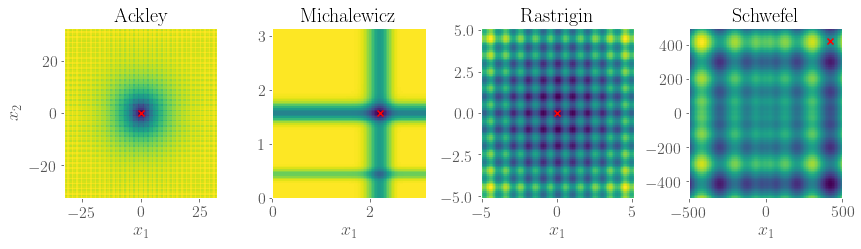

In [68]:
n = 100

plt.figure(figsize=(12, 3.5))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel,
]):
    o = o(d=2)
    z = o.sample_space(n)
    plt.subplot(1, 4, i + 1)
    plt.title(o.__class__.__name__)
    plt.imshow(o(z).reshape(n, n), 
               extent=(
                   z[:,0].min(), z[:,0].max(), 
                   z[:,1].min(), z[:,1].max()),
               aspect="auto"
              )
    plt.scatter(*o.optimum, marker='x', color='red')
    plt.grid(False)
    
    plt.xlabel('$x_1$')
    if i == 0:
        plt.ylabel('$x_2$')
    
plt.tight_layout()
plt.savefig('figures/objectives-2d.pdf', bbox_inches="tight")

# local penalization 

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


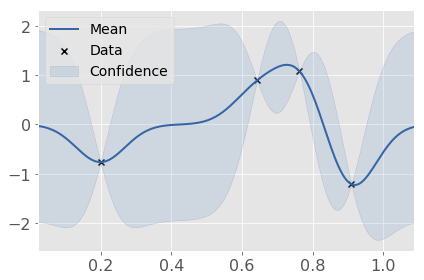

In [21]:
o = objective.Schwefel(d=1)
a = aquisition.SBUCB_LocalPenalty()

pn = 1000
predx = o.sample_space(pn)
predy = o(predx)

n = 4
scipy.random.seed(3)
xi = np.random.choice(np.arange(pn), n, replace=False)
# x = o.sample_space(pn)[np.random.choice(np.arange(pn), n, replace=False)]
x = predx[xi]
y = o(x)[:, None]

builder = modeler.Modeler(o, noiseless=True, kernel=GPy.kern.RBF(x.shape[1], ARD=False))

m = builder.build(x, y, resample=2)

mu, var = m.predict(builder.transform(predx))
mu = mu[:, 0]
var = var[:, 0]
alpha = -mu + a.beta(x.shape[0], 100) * np.sqrt(var)

a = aquisition.SBUCB_LocalPenalty(sample_size=3)
a._precompute(m, builder, predx, mu, var, True, n, pn)

cent = -100
nrm = scipy.stats.norm(cent, 50)
dists = [distribution.Discrete(predx[:,0], nrm.pdf(predx))]*o.d

pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)

pdf = pdf[:, 0]

nmu = mu * y.std() + y.mean()
nvar = var * y.var()

# gamma = np.sum(pdf[None, :] * a.gamma, 1)
gamma = np.sum(pdf[:, None] * a.gamma, 0)

m.plot()

In [22]:
np.argmin(np.sqrt(np.power(predx - cent, 2)))

400

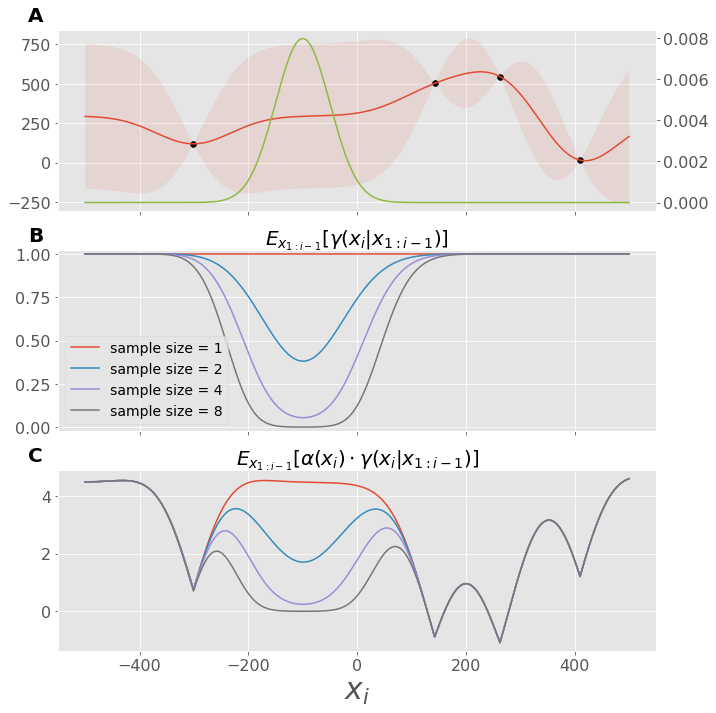

In [23]:
fig, axes = plt.subplots(3, 1, figsize=(10,10))

ax = axes[0]
ax.plot(predx, nmu)
ax.fill_between(predx[:, 0], nmu - 2*np.sqrt(nvar), nmu + 2 * np.sqrt(nvar), alpha=.1)
ax.scatter(x, y, color="k")
ax.set_xticklabels([])
axt = ax.twinx()
axt.plot(predx, pdf, color='C5')
axt.grid(False)
ax.text(-.05, 1.05, 'A', transform=ax.transAxes, size=20, weight="bold")

ax = axes[1]
[ax.plot(predx, np.power(gamma, i), label="sample size = {}".format(i+1)) for i in [0, 1, 3, 7]]
ax.legend(loc="lower left")
ax.set_title("$E_{x_{1:i-1}}[\gamma(x_i | x_{1:i-1})]$");
ax.set_ylim(-.02, 1.02)
ax.set_xticklabels([])
ax.text(-.05, 1.05, 'B', transform=ax.transAxes, size=20, weight="bold")

# ax = inset_axes(ax, "30%", "20%", "upper right", borderpad=2)
# ax.plot(predx, a.gamma[299:599:100, :].T, c="C5");
# ax.grid(False)
# ax.set_xlim(cent-250, cent+250)
# ax.set_yticklabels(["", ".5", "1.0"], fontdict={"fontsize":12})
# ax.axvline(cent, c='k')

ax = axes[2]
[ax.plot(predx, alpha*np.power(gamma, i), label="sample size = {}".format(1+i)) for i in [0, 1, 3, 7]]
ax.set_title(r"$E_{x_{1:i-1}}[\alpha(x_i) \cdot \gamma(x_i | x_{1:i-1})]$");
ax.set_xlabel('$x_i$', fontdict={"fontsize":30})
ax.text(-.05, 1.05, 'C', transform=ax.transAxes, size=20, weight="bold")

# ax = inset_axes(ax, "30%", "60%", "upper right", borderpad=1)

plt.tight_layout()

plt.savefig('figures/local-penalty.pdf')

TypeError: unhashable type: 'numpy.ndarray'

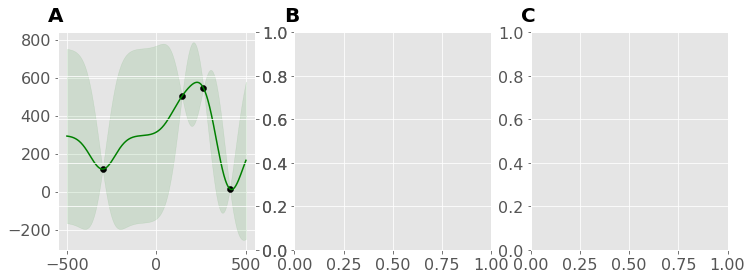

In [24]:
fig , (subax, ax, sax) = plt.subplots(ncols=3, figsize=(12,4))

subaxt = subax.twinx()

subax.plot(predx, nmu, c="green")
subax.fill_between(predx[:, 0], nmu - 2*np.sqrt(nvar), nmu + 2 * np.sqrt(nvar), alpha=.1, color="green")
subax.scatter(x, y, color="k")

subax.text(-.05, 1.05, 'A', transform=subax.transAxes, size=20, weight="bold")
ax.text(-.05, 1.05, 'B', transform=ax.transAxes, size=20, weight="bold")
ax.text(-.05, 1.05, 'C', transform=sax.transAxes, size=20, weight="bold")

ss = np.arange(0, 15)

for i, var in enumerate([50, 100, 200]):
    d = distribution.Discrete(predx, scipy.stats.norm(cent, var).pdf(predx))
    
    dists = [d]*o.d

    pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)
    pdf = pdf[:, 0]

    gamma = np.sum(pdf[:, None] * a.gamma, 0)

    ax.plot(ss+1, [(pdf*alpha*np.power(gamma, i)).sum() for i in ss], "C{}".format(i))
    
    sax.plot(ss+1, np.cumsum([(pdf*alpha*np.power(gamma, i)).sum() for i in ss]), "C{}".format(i))
        
    subaxt.plot(predx, pdf, color='C{}'.format(i))
    subaxt.grid(False)
    
subaxt.set_yticklabels([])
subax.set_xlabel("$x$", fontsize=20)
ax.set_xlabel("$i$")
ax.set_title(r"$E_x[\alpha(x_i) \cdot (\gamma_\pi(x_i))^{i-1}]$")
sax.set_xlabel("$B$")
sax.set_title(r"$\sum_i^B E_x[\alpha(x_i) \cdot (\gamma_\pi(x_i))^{i-1}]$")

plt.tight_layout()

plt.savefig("figures/local-penalty-sample-size.pdf")

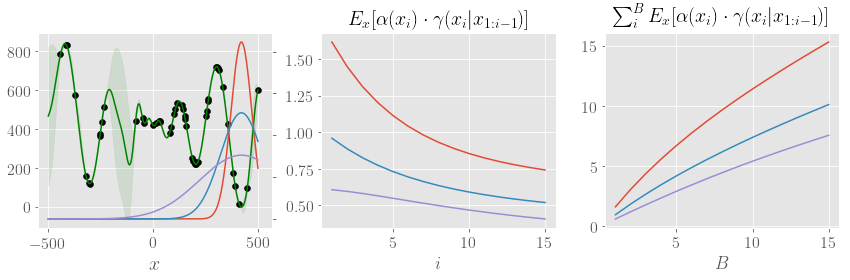

In [15]:
n = 50
scipy.random.seed(3)
xi = np.random.choice(np.arange(pn), n, replace=False)
# x = o.sample_space(pn)[np.random.choice(np.arange(pn), n, replace=False)]
x = predx[xi]
y = o(x)[:, None]

builder = modeler.Modeler(o, noiseless=True, kernel=GPy.kern.RBF(x.shape[1], ARD=False))

m = builder.build(x, y, resample=2)

mu, var = m.predict(builder.transform(predx))
mu = mu[:, 0]
var = var[:, 0]
alpha = -mu + a.beta(x.shape[0], 100) * np.sqrt(var)

a = aquisition.SBUCB_LocalPenalty(sample_size=3)
a._precompute(m, builder, predx, mu, var, True, n, pn)

cent = o.optimum[0]
nrm = scipy.stats.norm(cent, 50)
dists = [distribution.Discrete(predx, nrm.pdf(predx))]*o.d

pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)

pdf = pdf[:, 0]

nmu = mu * y.std() + y.mean()
nvar = var * y.var()

# gamma = np.sum(pdf[None, :] * a.gamma, 1)
gamma = np.sum(pdf[:, None] * a.gamma, 0)

fig , (subax, ax, sax) = plt.subplots(ncols=3, figsize=(12,4))

subaxt = subax.twinx()

subax.plot(predx, nmu, c="green")
subax.fill_between(predx[:, 0], nmu - 2*np.sqrt(nvar), nmu + 2 * np.sqrt(nvar), alpha=.1, color="green")
subax.scatter(x, y, color="k")

ss = np.arange(0, 15)

for i, var in enumerate([50, 100, 200]):
    d = distribution.Discrete(predx, scipy.stats.norm(cent, var).pdf(predx))
    
    dists = [d]*o.d

    pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)
    pdf = pdf[:, 0]

    gamma = np.sum(pdf[:, None] * a.gamma, 0)

    ax.plot(ss+1, [(pdf*alpha*np.power(gamma, i)).sum() for i in ss], "C{}".format(i))
    
    sax.plot(ss+1, np.cumsum([(pdf*alpha*np.power(gamma, i)).sum() for i in ss]), "C{}".format(i))
        
    subaxt.plot(predx, pdf, color='C{}'.format(i))
    subaxt.grid(False)
    
subaxt.set_yticklabels([])
subax.set_xlabel("$x$", fontsize=20)
ax.set_xlabel("$i$")
ax.set_title(r"$E_x[\alpha(x_i) \cdot \gamma(x_i | x_{1:i-1})]$")
sax.set_xlabel("$B$")
sax.set_title(r"$\sum_i^B E_x[\alpha(x_i) \cdot \gamma(x_i | x_{1:i-1})]$")

plt.tight_layout()
plt.savefig("figures/local-penalty-sample-size-late.pdf")

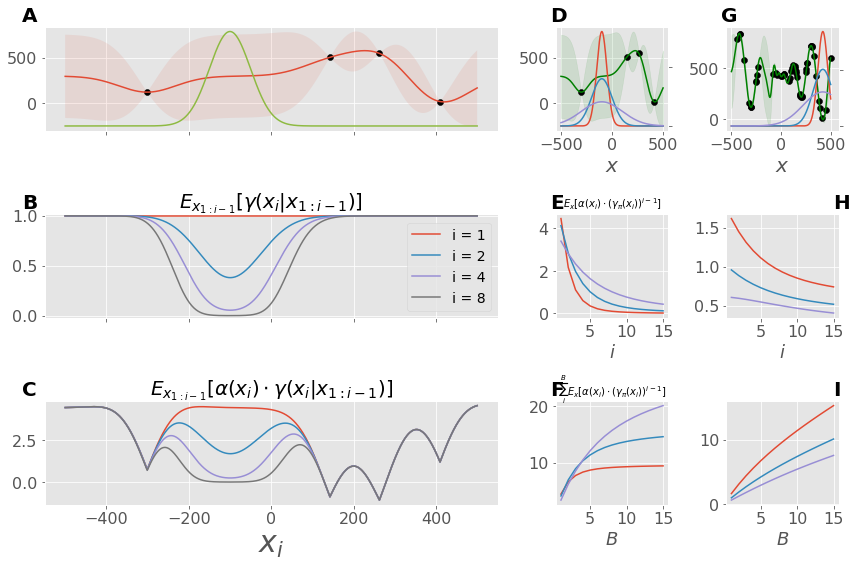

In [32]:
o = objective.Schwefel(d=1)
a = aquisition.SBUCB_LocalPenalty()

pn = 1000
predx = o.sample_space(pn)
predy = o(predx)

n = 4
scipy.random.seed(3)
xi = np.random.choice(np.arange(pn), n, replace=False)
# x = o.sample_space(pn)[np.random.choice(np.arange(pn), n, replace=False)]
x = predx[xi]
y = o(x)[:, None]

builder = modeler.Modeler(o, noiseless=True, kernel=GPy.kern.RBF(x.shape[1], ARD=False))

m = builder.build(x, y, resample=2)

mu, var = m.predict(builder.transform(predx))
mu = mu[:, 0]
var = var[:, 0]
alpha = -mu + a.beta(x.shape[0], 100) * np.sqrt(var)

a = aquisition.SBUCB_LocalPenalty(sample_size=3)
a._precompute(m, builder, predx, mu, var, True, n, pn)

cent = -100
nrm = scipy.stats.norm(cent, 50)
dists = [distribution.Discrete(predx[:,0], nrm.pdf(predx))]*o.d

pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)

pdf = pdf[:, 0]

nmu = mu * y.std() + y.mean()
nvar = var * y.var()

# gamma = np.sum(pdf[None, :] * a.gamma, 1)
gamma = np.sum(pdf[:, None] * a.gamma, 0)

########################################################################################

plt.figure(figsize=(12, 8))

ax = plt.subplot2grid((3, 5), (0, 0), colspan=3)
ax.plot(predx, nmu)
ax.fill_between(predx[:, 0], nmu - 2*np.sqrt(nvar), nmu + 2 * np.sqrt(nvar), alpha=.1)
ax.scatter(x, y, color="k")
ax.set_xticklabels([])
axt = ax.twinx()
axt.plot(predx, pdf, color='C5')
axt.grid(False)
axt.set_yticks([])
ax.text(-.05, 1.05, 'A', transform=ax.transAxes, size=20, weight="bold")

ax = plt.subplot2grid((3, 5), (1, 0), colspan=3)
[ax.plot(predx, np.power(gamma, i), label="i = {}".format(i+1)) for i in [0, 1, 3, 7]]
ax.legend(loc="lower right")
ax.set_title("$E_{x_{1:i-1}}[\gamma(x_i | x_{1:i-1})]$");
ax.set_ylim(-.02, 1.02)
ax.set_xticklabels([])
ax.text(-.05, 1.05, 'B', transform=ax.transAxes, size=20, weight="bold")

ax = plt.subplot2grid((3, 5), (2, 0), colspan=3)
[ax.plot(predx, alpha*np.power(gamma, i), label="i = {}".format(1+i)) for i in [0, 1, 3, 7]]
ax.set_title(r"$E_{x_{1:i-1}}[\alpha(x_i) \cdot \gamma(x_i | x_{1:i-1})]$");
ax.set_xlabel('$x_i$', fontdict={"fontsize":30})
ax.text(-.05, 1.05, 'C', transform=ax.transAxes, size=20, weight="bold")

########################################################################################

subax = plt.subplot2grid((3, 5), (0, 3))
ax = plt.subplot2grid((3, 5), (1, 3))
sax = plt.subplot2grid((3, 5), (2, 3))

subaxt = subax.twinx()

subax.plot(predx, nmu, c="green")
subax.fill_between(predx[:, 0], nmu - 2*np.sqrt(nvar), nmu + 2 * np.sqrt(nvar), alpha=.1, color="green")
subax.scatter(x, y, color="k")

subax.text(-.05, 1.05, 'D', transform=subax.transAxes, size=20, weight="bold")
ax.text(-.05, 1.05, 'E', transform=ax.transAxes, size=20, weight="bold")
ax.text(-.05, 1.05, 'F', transform=sax.transAxes, size=20, weight="bold")
# subax.text(.65, 1.05, r"$E_x[\alpha(x_i) \cdot (\gamma_\pi(x_i))^{i-1}]$", transform=ax.transAxes, size=20, weight="bold")

ss = np.arange(0, 15)

for i, var in enumerate([50, 100, 200]):
    d = distribution.Discrete(predx[:,0], scipy.stats.norm(cent, var).pdf(predx))
    
    dists = [d]*o.d

    pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)
    pdf = pdf[:, 0]

    gamma = np.sum(pdf[:, None] * a.gamma, 0)

    ax.plot(ss+1, [(pdf*alpha*np.power(gamma, i)).sum() for i in ss], "C{}".format(i))
    
    sax.plot(ss+1, np.cumsum([(pdf*alpha*np.power(gamma, i)).sum() for i in ss]), "C{}".format(i))
        
    subaxt.plot(predx, pdf, color='C{}'.format(i))
    subaxt.grid(False)
    
subaxt.set_yticklabels([])
subax.set_xlabel("$x$", fontsize=20)
ax.set_xlabel("$i$")
ax.set_title(r"$E_x[\alpha(x_i) \cdot (\gamma_\pi(x_i))^{i-1}]$", fontsize=10)
sax.set_xlabel("$B$")
sax.set_title(r"$\sum_i^B E_x[\alpha(x_i) \cdot (\gamma_\pi(x_i))^{i-1}]$", fontsize=10)

########################################################################################

n = 50
scipy.random.seed(3)
xi = np.random.choice(np.arange(pn), n, replace=False)
# x = o.sample_space(pn)[np.random.choice(np.arange(pn), n, replace=False)]
x = predx[xi]
y = o(x)[:, None]

builder = modeler.Modeler(o, noiseless=True, kernel=GPy.kern.RBF(x.shape[1], ARD=False))

m = builder.build(x, y, resample=2)

mu, var = m.predict(builder.transform(predx))
mu = mu[:, 0]
var = var[:, 0]
alpha = -mu + a.beta(x.shape[0], 100) * np.sqrt(var)

a = aquisition.SBUCB_LocalPenalty(sample_size=3)
a._precompute(m, builder, predx, mu, var, True, n, pn)

cent = o.optimum[0]
nrm = scipy.stats.norm(cent, 50)
dists = [distribution.Discrete(predx[:,0], nrm.pdf(predx))]*o.d

pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)

pdf = pdf[:, 0]

nmu = mu * y.std() + y.mean()
nvar = var * y.var()

# gamma = np.sum(pdf[None, :] * a.gamma, 1)
gamma = np.sum(pdf[:, None] * a.gamma, 0)

subax = plt.subplot2grid((3, 5), (0, 4))
ax = plt.subplot2grid((3, 5), (1, 4))
sax = plt.subplot2grid((3, 5), (2, 4))
subaxt = subax.twinx()

subax.plot(predx, nmu, c="green")
subax.fill_between(predx[:, 0], nmu - 2*np.sqrt(nvar), nmu + 2 * np.sqrt(nvar), alpha=.1, color="green")
subax.scatter(x, y, color="k")

ss = np.arange(0, 15)

for i, var in enumerate([50, 100, 200]):
    d = distribution.Discrete(predx[:,0], scipy.stats.norm(cent, var).pdf(predx))
    
    dists = [d]*o.d

    pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)
    pdf = pdf[:, 0]

    gamma = np.sum(pdf[:, None] * a.gamma, 0)

    ax.plot(ss+1, [(pdf*alpha*np.power(gamma, i)).sum() for i in ss], "C{}".format(i))
    
    sax.plot(ss+1, np.cumsum([(pdf*alpha*np.power(gamma, i)).sum() for i in ss]), "C{}".format(i))
        
    subaxt.plot(predx, pdf, color='C{}'.format(i))
    subaxt.grid(False)
    
subaxt.set_yticklabels([])
subax.set_xlabel("$x$", fontsize=20)
ax.set_xlabel("$i$")
subax.text(-.05, 1.05, 'G', transform=subax.transAxes, size=20, weight="bold")
ax.text(.95, 1.05, 'H', transform=ax.transAxes, size=20, weight="bold")
ax.text(.95, 1.05, 'I', transform=sax.transAxes, size=20, weight="bold")

# ax.set_title(r"$E_x[\alpha(x_i) \cdot \gamma(x_i | x_{1:i-1})]$")
sax.set_xlabel("$B$")
# sax.set_title(r"$\sum_i^B E_x[\alpha(x_i) \cdot \gamma(x_i | x_{1:i-1})]$")

########################################################################################

plt.tight_layout()
plt.savefig("figures/local-penalty-combined.pdf")

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


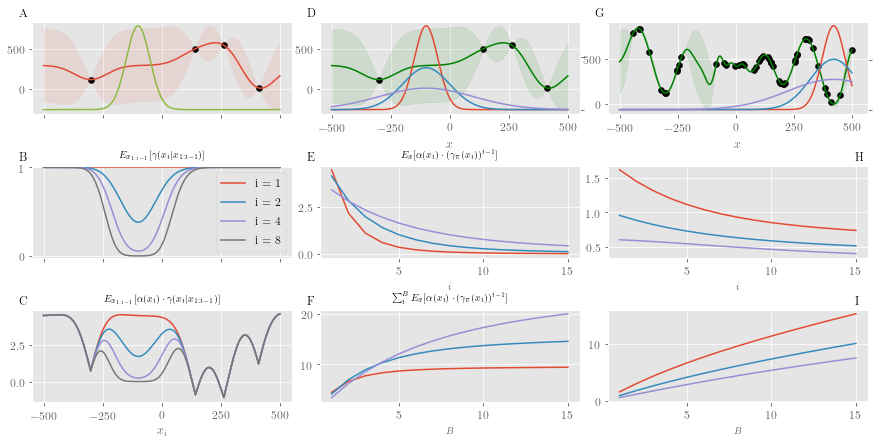

In [56]:

# mpl.rc("font", **{'size'   : 8})


with plt.style.context(('ggplot')):
    plt.rcParams.update({'font.size': 8})
    mpl.rc('xtick', labelsize=12) 
    mpl.rc('ytick', labelsize=12) 

    
    o = objective.Schwefel(d=1)
    a = aquisition.SBUCB_LocalPenalty()

    pn = 1000
    predx = o.sample_space(pn)
    predy = o(predx)

    n = 4
    scipy.random.seed(3)
    xi = np.random.choice(np.arange(pn), n, replace=False)
    # x = o.sample_space(pn)[np.random.choice(np.arange(pn), n, replace=False)]
    x = predx[xi]
    y = o(x)[:, None]

    builder = modeler.Modeler(o, noiseless=True, kernel=GPy.kern.RBF(x.shape[1], ARD=False))

    m = builder.build(x, y, resample=2)

    mu, var = m.predict(builder.transform(predx))
    mu = mu[:, 0]
    var = var[:, 0]
    alpha = -mu + a.beta(x.shape[0], 100) * np.sqrt(var)

    a = aquisition.SBUCB_LocalPenalty(sample_size=3)
    a._precompute(m, builder, predx, mu, var, True, n, pn)

    cent = -100
    nrm = scipy.stats.norm(cent, 50)
    dists = [distribution.Discrete(predx[:,0], nrm.pdf(predx))]*o.d

    pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)

    pdf = pdf[:, 0]

    nmu = mu * y.std() + y.mean()
    nvar = var * y.var()

    # gamma = np.sum(pdf[None, :] * a.gamma, 1)
    gamma = np.sum(pdf[:, None] * a.gamma, 0)

    ########################################################################################

    plt.figure(figsize=(12, 6))

    ax = plt.subplot2grid((3, 3), (0, 0), colspan=1)
    ax.plot(predx, nmu)
    ax.fill_between(predx[:, 0], nmu - 2*np.sqrt(nvar), nmu + 2 * np.sqrt(nvar), alpha=.1)
    ax.scatter(x, y, color="k")
    ax.set_xticklabels([])
    axt = ax.twinx()
    axt.plot(predx, pdf, color='C5')
    axt.grid(False)
    axt.set_yticks([])
    ax.text(-.05, 1.05, 'A', transform=ax.transAxes, size=12, weight="bold")

    ax = plt.subplot2grid((3, 3), (1, 0), colspan=1)
    [ax.plot(predx, np.power(gamma, i), label="i = {}".format(i+1)) for i in [0, 1, 3, 7]]
    ax.legend(loc="lower right", fontsize=12)
    ax.set_title("$E_{x_{1:i-1}}[\gamma(x_i | x_{1:i-1})]$", fontsize=10);
    ax.set_ylim(-.02, 1.02)
    ax.set_xticklabels([])
    ax.text(-.05, 1.05, 'B', transform=ax.transAxes, size=12, weight="bold")

    ax = plt.subplot2grid((3, 3), (2, 0), colspan=1)
    [ax.plot(predx, alpha*np.power(gamma, i), label="i = {}".format(1+i)) for i in [0, 1, 3, 7]]
    ax.set_title(r"$E_{x_{1:i-1}}[\alpha(x_i) \cdot \gamma(x_i | x_{1:i-1})]$", fontsize=10);
    ax.set_xlabel('$x_i$', fontdict={"fontsize":12})
    ax.text(-.05, 1.05, 'C', transform=ax.transAxes, size=12, weight="bold")

    ########################################################################################

    subax = plt.subplot2grid((3, 3), (0, 1))
    ax = plt.subplot2grid((3, 3), (1, 1))
    sax = plt.subplot2grid((3, 3), (2, 1))

    subaxt = subax.twinx()

    subax.plot(predx, nmu, c="green")
    subax.fill_between(predx[:, 0], nmu - 2*np.sqrt(nvar), nmu + 2 * np.sqrt(nvar), alpha=.1, color="green")
    subax.scatter(x, y, color="k")

    subax.text(-.05, 1.05, 'D', transform=subax.transAxes, size=12, weight="bold")
    ax.text(-.05, 1.05, 'E', transform=ax.transAxes, size=12, weight="bold")
    ax.text(-.05, 1.05, 'F', transform=sax.transAxes, size=12, weight="bold")
    # subax.text(.65, 1.05, r"$E_x[\alpha(x_i) \cdot (\gamma_\pi(x_i))^{i-1}]$", transform=ax.transAxes, size=20, weight="bold")

    ss = np.arange(0, 15)

    for i, var in enumerate([50, 100, 200]):
        d = distribution.Discrete(predx[:,0], scipy.stats.norm(cent, var).pdf(predx))

        dists = [d]*o.d

        pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)
        pdf = pdf[:, 0]

        gamma = np.sum(pdf[:, None] * a.gamma, 0)

        ax.plot(ss+1, [(pdf*alpha*np.power(gamma, i)).sum() for i in ss], "C{}".format(i))

        sax.plot(ss+1, np.cumsum([(pdf*alpha*np.power(gamma, i)).sum() for i in ss]), "C{}".format(i))

        subaxt.plot(predx, pdf, color='C{}'.format(i))
        subaxt.grid(False)

    subaxt.set_yticklabels([])
    subax.set_xlabel("$x$", fontsize=12)
    ax.set_xlabel("$i$")
    ax.set_title(r"$E_x[\alpha(x_i) \cdot (\gamma_\pi(x_i))^{i-1}]$", fontsize=10)
    sax.set_xlabel("$B$")
    sax.set_title(r"$\sum_i^B E_x[\alpha(x_i) \cdot (\gamma_\pi(x_i))^{i-1}]$", fontsize=10)

    ########################################################################################

    n = 50
    scipy.random.seed(3)
    xi = np.random.choice(np.arange(pn), n, replace=False)
    # x = o.sample_space(pn)[np.random.choice(np.arange(pn), n, replace=False)]
    x = predx[xi]
    y = o(x)[:, None]

    builder = modeler.Modeler(o, noiseless=True, kernel=GPy.kern.RBF(x.shape[1], ARD=False))

    m = builder.build(x, y, resample=2)

    mu, var = m.predict(builder.transform(predx))
    mu = mu[:, 0]
    var = var[:, 0]
    alpha = -mu + a.beta(x.shape[0], 100) * np.sqrt(var)

    a = aquisition.SBUCB_LocalPenalty(sample_size=3)
    a._precompute(m, builder, predx, mu, var, True, n, pn)

    cent = o.optimum[0]
    nrm = scipy.stats.norm(cent, 50)
    dists = [distribution.Discrete(predx[:,0], nrm.pdf(predx))]*o.d

    pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)

    pdf = pdf[:, 0]

    nmu = mu * y.std() + y.mean()
    nvar = var * y.var()

    # gamma = np.sum(pdf[None, :] * a.gamma, 1)
    gamma = np.sum(pdf[:, None] * a.gamma, 0)

    subax = plt.subplot2grid((3, 3), (0, 2))
    ax = plt.subplot2grid((3, 3), (1, 2))
    sax = plt.subplot2grid((3, 3), (2, 2))
    subaxt = subax.twinx()

    subax.plot(predx, nmu, c="green")
    subax.fill_between(predx[:, 0], nmu - 2*np.sqrt(nvar), nmu + 2 * np.sqrt(nvar), alpha=.1, color="green")
    subax.scatter(x, y, color="k")

    ss = np.arange(0, 15)

    for i, var in enumerate([50, 100, 200]):
        d = distribution.Discrete(predx[:,0], scipy.stats.norm(cent, var).pdf(predx))

        dists = [d]*o.d

        pdf = np.prod([dists[i].pdf(predx[:, i]) for i in range(x.shape[1])], 0)
        pdf = pdf[:, 0]

        gamma = np.sum(pdf[:, None] * a.gamma, 0)

        ax.plot(ss+1, [(pdf*alpha*np.power(gamma, i)).sum() for i in ss], "C{}".format(i))

        sax.plot(ss+1, np.cumsum([(pdf*alpha*np.power(gamma, i)).sum() for i in ss]), "C{}".format(i))

        subaxt.plot(predx, pdf, color='C{}'.format(i))
        subaxt.grid(False)

    subaxt.set_yticklabels([])
    subax.set_xlabel("$x$", fontsize=12)
    ax.set_xlabel("$i$")
    subax.text(-.05, 1.05, 'G', transform=subax.transAxes, size=12, weight="bold")
    ax.text(.95, 1.05, 'H', transform=ax.transAxes, size=12, weight="bold")
    ax.text(.95, 1.05, 'I', transform=sax.transAxes, size=12, weight="bold")

    # ax.set_title(r"$E_x[\alpha(x_i) \cdot \gamma(x_i | x_{1:i-1})]$")
    sax.set_xlabel("$B$")
    # sax.set_title(r"$\sum_i^B E_x[\alpha(x_i) \cdot \gamma(x_i | x_{1:i-1})]$")

    ########################################################################################

    plt.tight_layout(0)
    plt.savefig("figures/local-penalty-combined-alt.pdf")

# regret 

ackley
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
michalewicz
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
rastrigin
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
schwefel
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)


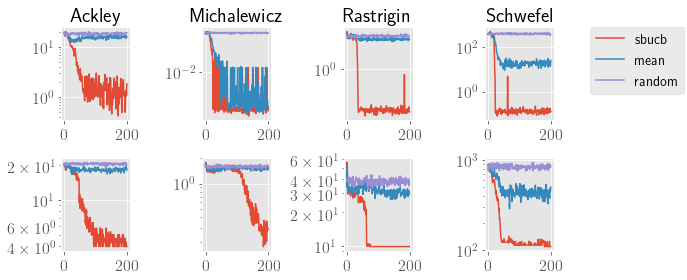

In [10]:
reload(aggregate)

fig = plt.figure(figsize=(8, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    plt.subplot(2, 4, i+1)
    plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            print(meth, r.frame.shape)
            if i==0:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 4, i+5)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            print(meth, r.frame.shape)
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .88), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.savefig("figures/regret-average-multidim-sequential.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


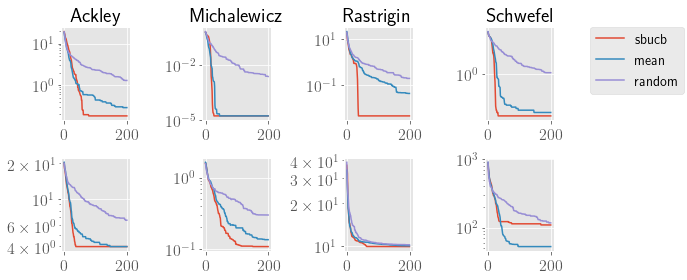

In [11]:
reload(aggregate)

fig = plt.figure(figsize=(8, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    plt.subplot(2, 4, i+1)
    plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            if i==0:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))
                
            # plt.fill_between(np.arange(r.mean.shape[0]), r.mean[:,0] - 2*r.std[:,0], r.mean[:,0] + 2*r.std[:,0], color="C{}".format(j), alpha=.3)

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 4, i+5)
    # plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .88), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.savefig("figures/regret-simple-multidim-sequential.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


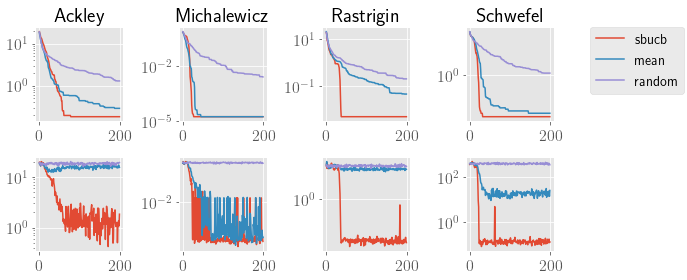

In [12]:
reload(aggregate)

fig = plt.figure(figsize=(8, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    plt.subplot(2, 4, i+1)
    plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            if i==0:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 4, i+5)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .88), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.savefig("figures/regret-both-d1-sequential.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


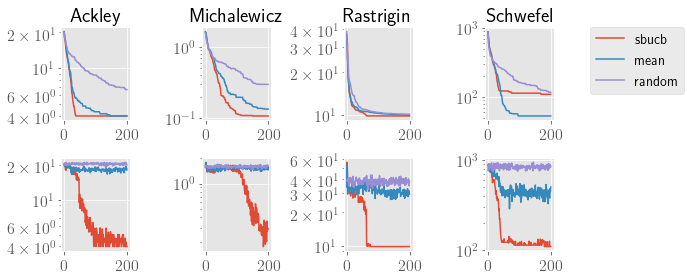

In [13]:
reload(aggregate)

fig = plt.figure(figsize=(8, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    plt.subplot(2, 4, i+1)
    plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            if i==0:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 4, i+5)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .88), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.savefig("figures/regret-both-d2-sequential.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


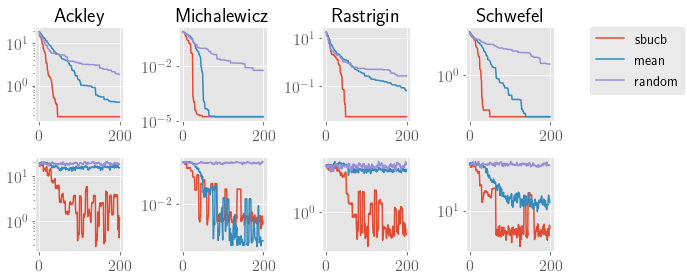

In [14]:
reload(aggregate)

fig = plt.figure(figsize=(8, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    plt.subplot(2, 4, i+1)
    plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d1/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            if i==0:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 4, i+5)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d1/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .88), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.savefig("figures/regret-both-d1-batch5.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


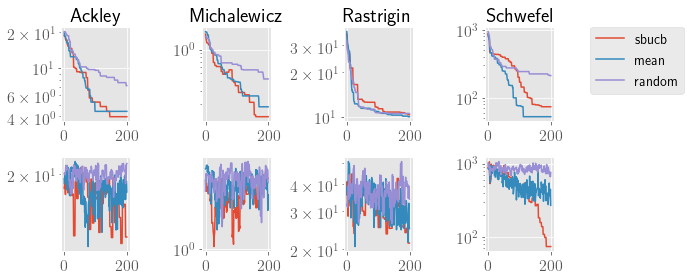

In [117]:
reload(aggregate)

fig = plt.figure(figsize=(8, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    plt.subplot(2, 4, i+1)
    plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d2/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            if i==0:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 4, i+5)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d2/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .88), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.savefig("figures/regret-both-d2-batch5.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


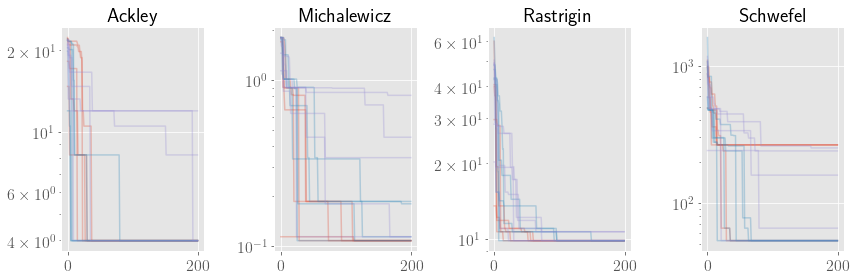

In [123]:
reload(aggregate)

plt.figure(figsize=(12, 4))
# for i, o in enumerate(objective.Objective.__subclasses__()):
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())
    
    try:
    
        plt.subplot(1, 4, i+1)
        plt.title(o.__name__)
        
        for j, meth in enumerate(["sbucb", "mean", "random"]):
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True
            )
            plt.plot(np.arange(r.mean.shape[0]), r.frame[:5,:,0].T, alpha=.3, label=meth, c="C{}".format(j))
            # plt.plot(np.arange(r.mean.shape[0]), r.median, alpha=1, label=meth, c="C{}".format(j))
            
            # plt.fill_between(np.arange(r.mean.shape[0]), r.percentile(5)[:,0], r.percentile(95)[:,0], alpha = .2)
            
#         if i == 0:
#             plt.legend()

        plt.semilogy()
        
    except Exception as e:
        print(e)
        traceback.print_exc()
    
plt.tight_layout()
# plt.savefig("figures/regret-2d-sequential.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


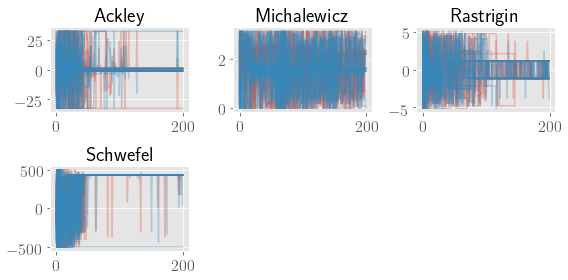

In [124]:
reload(aggregate)

plt.figure(figsize=(8, 4))
# for i, o in enumerate(objective.Objective.__subclasses__()):
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())
    
    try:
    
        plt.subplot(2, 3, i+1)
        plt.title(o.__name__)
        
        for j in range(2):
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/mean/sample_size1/".format(o.__name__.lower()), 
                'hyperparams.csv', 
                [j],
            )
            plt.plot(np.arange(r.mean.shape[0]), r.frame[:,:,0].T, alpha=.3, label=meth, c="C{}".format(j))
            # plt.plot(np.arange(r.mean.shape[0]), r.mean, alpha=1, label=meth, c="C{}".format(j))
            # plt.fill_between(np.arange(r.mean.shape[0]), r.percentile(5)[:,0], r.percentile(95)[:,0], alpha = .2)
            
#         if i == 0:
#             plt.legend()

#         plt.semilogy()
        
    except Exception as e:
        print(e)
        traceback.print_exc()
    
plt.tight_layout()
# plt.savefig("figures/regret-2d-sequential.pdf", bbox_inches='tight')

ackley
dropwave
griewank
michalewicz
rastrigin
schwefel


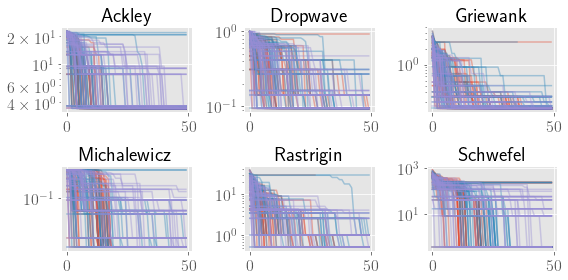

In [602]:
reload(aggregate)

plt.figure(figsize=(8, 4))
# for i, o in enumerate(objective.Objective.__subclasses__()):
for i, o in enumerate([
    objective.Ackley, 
    objective.Dropwave,
    objective.Griewank,
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())
    
    try:

        plt.subplot(2, 3, i+1)
        plt.title(o.__name__)
        
        for j, meth in enumerate(["sbucb", "mean", "random"]):
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True
            )
            plt.plot(r.frame[:,:,0].T, c='C{}'.format(j), alpha=.4, label=meth)
        
        plt.semilogy()
        
        if i == 0:
            pass
            #plt.legend()
        
    except Exception as e:
        print(e)
        traceback.print_exc()
    
plt.tight_layout()
plt.savefig('figures/regret-1d-trace.pdf')

ackley
dropwave
griewank
michalewicz
rastrigin
schwefel


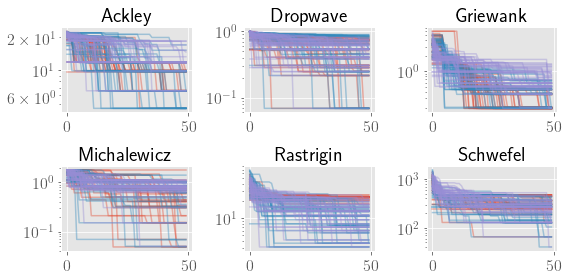

In [601]:
reload(aggregate)

plt.figure(figsize=(8, 4))
# for i, o in enumerate(objective.Objective.__subclasses__()):
for i, o in enumerate([
    objective.Ackley, 
    objective.Dropwave,
    objective.Griewank,
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())
    
    try:

        plt.subplot(2, 3, i+1)
        plt.title(o.__name__)
        
        for j, meth in enumerate(["sbucb", "mean", "random"]):
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True
            )
            plt.plot(r.frame[:,:,0].T, c='C{}'.format(j), alpha=.4, label=meth)
        
        plt.semilogy()
        
        if i == 0:
            pass
            #plt.legend()
        
    except Exception as e:
        print(e)
        traceback.print_exc()
    
plt.tight_layout()
plt.savefig('figures/regret-2d-trace.pdf')

# hyperparams 

ackley
michalewicz
rastrigin
schwefel


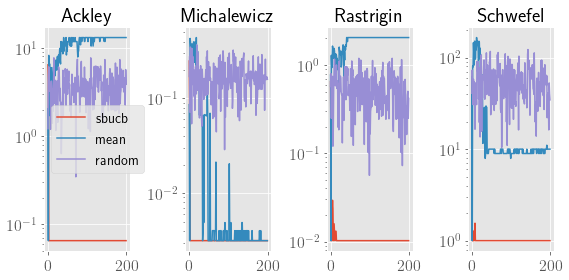

In [125]:
reload(aggregate)

# plt.figure(figsize=(8, 4))
_, axes = plt.subplots(1, 4, figsize=(8,4))
_axes = axes.ravel().tolist()

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())
    
    try:
        
        ax = _axes[i]
        ax.set_title(o.__name__)
        
        for meth in ["sbucb", "mean", "random"]:
        
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'hyperparams.csv', 
                [1],
            )
            ax.plot(r.mean, label=meth)

            ax.semilogy()
        
    except Exception as e:
        print(e)
        traceback.print_exc()
        
_axes[0].legend()
        
plt.tight_layout()
plt.savefig("figures/variance-method-compare-1d.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


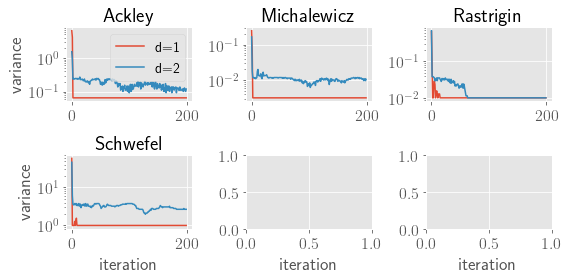

In [127]:
reload(aggregate)

# plt.figure(figsize=(8, 4))
_, axes = plt.subplots(2, 3, figsize=(8,4))
_axes = axes.ravel().tolist()

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())
    
    try:
        
        ax = _axes[i]
        ax.set_title(o.__name__)
        
        r = aggregate.Aggregate.build(
            "output/stochastic-sequential-d1/{}/sbucb/sample_size1/".format(o.__name__.lower()), 
            'hyperparams.csv', 
            [1],
        )
        ax.plot(r.mean, label="d=1")
        
        r = aggregate.Aggregate.build(
            "output/stochastic-sequential-d2/{}/sbucb/sample_size1/".format(o.__name__.lower()), 
            'hyperparams.csv', 
            [2],
        )
        ax.plot(r.mean, label="d=2")
        
        ax.semilogy()
        
    except Exception as e:
        print(e)
        traceback.print_exc()
        
label_simulation_plots(axes, "variance")
    
plt.tight_layout()
plt.savefig("figures/variance-d-compare.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


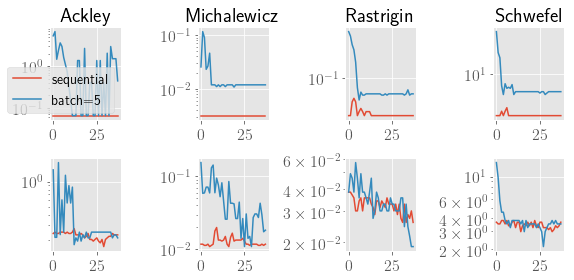

In [130]:
reload(aggregate)

# plt.figure(figsize=(8, 4))
_, axes = plt.subplots(2, 4, figsize=(8,4))
_axes = axes.ravel().tolist()

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    
    for j, d in enumerate([1, 2]):

        try:

            ax = _axes[i+j*4]
            
            if d == 1:
                ax.set_title(o.__name__)
                print(o.__name__.lower())

            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d{}/{}/sbucb/sample_size1/".format(d, o.__name__.lower()), 
                'hyperparams.csv', 
                [d],
            )
            ax.plot(r.mean[2:40:], label="sequential")

            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d{}/{}/sbucb/sample_size5/".format(d, o.__name__.lower()), 
                'hyperparams.csv', 
                [d],
            )
            ax.plot(r.mean[2:], label="batch=5")

            ax.semilogy()

        except Exception as e:
            print(e)
            traceback.print_exc()

_axes[0].legend()
    
plt.tight_layout()
plt.savefig("figures/variance-d1-batchsize-compare.pdf", bbox_inches='tight')
